<a href="https://colab.research.google.com/github/pcpiscator/01T2021/blob/main/C%C3%B3pia(C_EX_)_de_An%C3%A1lise_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Tweets
> Por Marcelo Pias


<img width=480 src="https://miro.medium.com/max/450/1*p3Ste5R_iJzi5IcSmFkmtg.jpeg"> </img>



**IMPORTANTE: você deve salvar este notebook localmente (computador ou Google Drive) para poder trabalhar nos exercícios. Basta clicar no Menu Arquivo-> Salvar cópia no Drive.**

# Jupyter Notebooks

Antes de entrarmos no tópico de **análise de tweets**, é importante relembrarmos sobre o nosso ambiente de desenvolvimento **Jupyter Notebook** no Google Colaboratory. Este ambiente, neste momento sendo utilizado, permite criar um documento com células contendo texto, imagens e "pedaços" de código em uma linguagem de programação como Python. 

O **notebook** que iremos explorar neste laboratório encontra-se em uma plataforma na nuvem, neste caso, o Google Colab. Sempre que aparecer a célula como a mostrada abaixo, com dois colchetes [], indica que é uma célula de código em Python. Basta clicar nesta e usar a combinação das teclas SHIFT+ENTER com intuito de executar o código. 

Agora tente você mesmo na célula abaixo. Posicione o curso do mouse na célula, e pressione simultaneamente SHIFT+ENTER. O código será executado:


In [1]:
print('Hello World')

Hello World



<img src="https://sd.keepcalms.com/i/keep-calm-and-viva-sao-joao.png" width=240> </img>

Neste contato com este Jupyter Notebook, exploraremos o **óbvio** ao executar o código Python que foi pré-preenchido na célula. Portanto, fique tranquil* pois o importante é apenas executar a célula com SHIFT+ENTER, e como bônus, se possível tentar entender o que está sendo feito à medida que avançamos no material. De certa forma, o resultado em cada célula já deve ser revelador. Novamente, Mantenha a Calma e controle o Pânico ;)


# Minerando o Twitter

A interface, chamada de API, que nos permite acessar os dados do Twitter trabalha com um método de autenticação de usuário. Tal método é utilizado para garantir que o usuário é conhecido ao sistema, e tem autorização para acessar os dados. O Twitter implementa o mecanismo de autenticação chamado OAuth 1.0A. 
Para facilitar nosso trabalho didático, utilizaremos os identificadores OAuth 1.0A associados à uma conta existente do Twitter (com a devida autorização do mesmo).Estas credenciais estão auto-preenchidas abaixo. 

## Credenciais para acessar uma conta do Twitter

Primeiramente, precisamos importar o módulo *twitter.*

In [25]:
pip install twitter

In [4]:
import twitter

# Abaixo temos os dados das quatro variáveis OAuth 1.0A
# Estas credenciais foram pré-preenchidas para facilitar nosso trabalho.

CONSUMER_KEY = 'SYFpddpGiwLKmMBaUPellGXki'
CONSUMER_SECRET = 'llbWAFXd5CRvK5GVYwvDPV2dpsHrkz2CVmG5ESXXSg13hnWGJx'
OAUTH_TOKEN = '234736278-xdQ9DJ3fNTcyRElqD6mNvCFOfyIWgsp9rGvsFPBv'
OAUTH_TOKEN_SECRET = '0hE4P481ByaOGsiIW95DyEqZfXmQmKtVpJ68GOzwMf896'

# O método abaixo cria o objeto auth que está relacionado ao usuário autenticado
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# A linha abaixo apenas mostra que twitter_api é uma variável definida (objeto)

print(twitter_api)

## Busca por tópicos com tendências

In [26]:
# Para representar uma localização, utilizamos um tipo de identificação criada
# pelo Yahoo! chamada de 'Where On Earth ID' (ID de onde no Planeta?). 
# O WOE ID para o mundo é o valor 1.
# Ao consultar as URLs https://dev.twitter.com/docs/api/1.1/get/trends/place e
# http://developer.yahoo.com/geo/geoplanet/
# Podemos encontrar o ID para o Brasil, sendo o valor 23424768

WORLD_WOE_ID = 1
BR_WOE_ID = 23424768				

# Busca-se os tópicos de tendência para o Mundo e Brasil					
tendencia_mundo = twitter_api.trends.place(_id=WORLD_WOE_ID)
tendencia_br = twitter_api.trends.place(_id=BR_WOE_ID)

print(tendencia_mundo)
print()
print(tendencia_br)	


[{'trends': [{'name': '#TemptationIsland', 'url': 'http://twitter.com/search?q=%23TemptationIsland', 'promoted_content': None, 'query': '%23TemptationIsland', 'tweet_volume': 97993}, {'name': '#LoveIsland', 'url': 'http://twitter.com/search?q=%23LoveIsland', 'promoted_content': None, 'query': '%23LoveIsland', 'tweet_volume': 142118}, {'name': 'Richard Donner', 'url': 'http://twitter.com/search?q=%22Richard+Donner%22', 'promoted_content': None, 'query': '%22Richard+Donner%22', 'tweet_volume': 39356}, {'name': 'Tommaso', 'url': 'http://twitter.com/search?q=Tommaso', 'promoted_content': None, 'query': 'Tommaso', 'tweet_volume': 30829}, {'name': '#EuApoioVotoAuditavel', 'url': 'http://twitter.com/search?q=%23EuApoioVotoAuditavel', 'promoted_content': None, 'query': '%23EuApoioVotoAuditavel', 'tweet_volume': 200396}, {'name': '#MerveAkpınar', 'url': 'http://twitter.com/search?q=%23MerveAkp%C4%B1nar', 'promoted_content': None, 'query': '%23MerveAkp%C4%B1nar', 'tweet_volume': 19275}, {'name':

Os tópicos em tendência encontram-se armazenados em *tendencia_mundo*, na lista *trends* como visto acima. O *loop* abaixo percorre essa lista, e imprime cada elemento. Como resultado temos a lista de tópicos para o mundo todo (ID WOE = 1). 

In [27]:
for trend in tendencia_mundo[0]['trends']:
    print(trend['name'])

#TemptationIsland
#LoveIsland
Richard Donner
Tommaso
#EuApoioVotoAuditavel
#MerveAkpınar
Valentina
#conquisfinal
Toby
ASSISTA YOUNG ROYALS
Faye
Lethal Weapon
Filippo
The Goonies
The Omen
Superman
Brad
STAY THIS FRIDAY
harry styles
Francisco Encina
Rachel
Olivia Wilde
BABI E NIVEA MEN DEEP
Tobin
Liberty
Raducanu
Jorge Ramos
Boris
Parasite
Giulia
PRE SAVE QUERO PALMINHAS
Paul Rudd
128gb
Casa Amor
Correo Argentino
Dulceida
Stephen Dorff
John McEnroe
Nick Wright
Scrooged
Eneko
REQUEST
Vin Diesel
Euro 10
Federer
Gabriel Mercado
Toretto
Segpres
QUERO MEU PIX
Ladyhawke


O *loop* abaixo percorre a lista de tópicos armazenada em *trends* na variável *tendencia_br*. 

In [28]:
for trend in tendencia_br[0]['trends']:
    print(trend['name'])

#EuApoioVotoAuditavel
ASSISTA YOUNG ROYALS
BABI E NIVEA MEN DEEP
#DesmonetizaLGBTfobia
harry styles
PRE SAVE QUERO PALMINHAS
Richard Donner
128gb
STAY THIS FRIDAY
Olivia Wilde
QUERO MEU PIX
#AmoresVerdadeiros106
Gabriel Mercado
#CiroAvisou
Tobin
Em Alagoas
PRA CIMA CORINTHIANS
FICA TROPA DO CARECA
Máquina Mortífera
Nanno
64gb
CENTO E QUARENTA E OITO
256gb
MEET SAVANNAH CLARKE
#MTVHitsAnos90
7M LOUD VOLTAN
Larry
1 ANO DE LOUD THAIGA
Micheque
148 ITENS
Petrobras
Goonies
Adrilles
Samsung
Podolski
PRESAVE PEOPLE WATCHING
casemiro
Nelson
Rachadinha
Gabriel Silva
Jovem Klan
junko
Barroso
Queiroz
Coutinho
16gb
Michelle Bolsonaro
Louis Vuitton
hugo gloss
Saul


Muitas das vezes os tópicos em um país como o Brasil também estão também em tendência na lista mundial. O código Phyton abaixo busca exatamente esta intersecção entre tópicos do Brasil e Mundo. 

In [29]:
# Define conjunto com tend^ncias mundias
conj_tendencias_mundo = set([trend['name'] 
                        for trend in tendencia_mundo[0]['trends']])

# Define conjunto com tendências no Brasil
conj_tendencias_br = set([trend['name'] 
                     for trend in tendencia_br[0]['trends']]) 

# Abaixo fazemos a intersecção entre dois conjuntos
tendencias_comum = conj_tendencias_mundo.intersection(conj_tendencias_br)

print(tendencias_comum)

{'Tobin', 'Gabriel Mercado', 'STAY THIS FRIDAY', '#EuApoioVotoAuditavel', 'BABI E NIVEA MEN DEEP', 'PRE SAVE QUERO PALMINHAS', 'harry styles', 'QUERO MEU PIX', 'Olivia Wilde', '128gb', 'Richard Donner', 'ASSISTA YOUNG ROYALS'}


## Anatomia de um Tweet

Podemos especificar um texto para pesquisa como um tópico em tendência. Se setarmos a variável *q* abaixo, podemos pesquisar por um conteúdo. Neste momento a palavra 'Portugal' está em alta, e com isto utilizamos esta palavra nos exemplos abaixo. 

In [41]:
import json

# Variável 'q' seta para o tópico 'Portugal'

# Tente outras palavras mudando o valor desta variável. 
q = '#Portugal' 

count = 100

# Importa modulo 'unquote' para prevenir erros em url 
from urllib.parse import unquote

# Solicita a pesquisa através do método twitter_api.search.tweets, passando como
# parâmetro a string em *q*.

resultados_pesquisa = twitter_api.search.tweets(q=q, count=count)

statuses = resultados_pesquisa['statuses']

# Faz a iteração em 5 blocos de resultados seguindo um 'cursor'
for _ in range(5):
    print('Tamanho do conjunto de status', len(statuses))
    try:
        proximos_resultados = resultados_pesquisa['search_metadata']['proximos_resultados']
    except KeyError as e: # Termina quando proximos_resultados termina de existir
        break
        
    # Cria um dicionário de proximos_resultados
    kwargs = dict([ kv.split('=') for kv in unquote(proximos_resultados[1:]).split("&") ])
    
    resultados_pesquisa = twitter_api.search.tweets(**kwargs)
    statuses += resultados_pesquisa['statuses']

# Mostra uma pequena amostra do resultado.
# O resultado está no formato JSON, conforme mostrado abaixo.
print(json.dumps(statuses[0], indent=1))

Tamanho do conjunto de status 100
{
 "created_at": "Mon Jul 05 22:09:02 +0000 2021",
 "id": 1412171689350283268,
 "id_str": "1412171689350283268",
 "text": "RT @risklayer: Insanity. \nLast Summer we pointed out the issues with the #Corona \"risk zones\" in #Germany being 10 to 20 days late. \nThere\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "Corona",
    "indices": [
     73,
     80
    ]
   },
   {
    "text": "Germany",
    "indices": [
     97,
     105
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "risklayer",
    "name": "Risklayer",
    "id": 2902636475,
    "id_str": "2902636475",
    "indices": [
     3,
     13
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": nul

In [42]:
# Importante também o número de vezes que um tweet específico foi re-tuitado.  

for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @risklayer: Insanity. 
Last Summer we pointed out the issues with the #Corona "risk zones" in #Germany being 10 to 20 days late. 
There…
Favorites:  0
Retweets:  10

RT @risklayer: "Ab Mittwoch gelten #Portugal und #Großbritannien nicht mehr als #Corona Virusvariantengebiete. Die Bundesregierung stuft si…
Favorites:  0
Retweets:  38

RT @risklayer: Insanity. 
Last Summer we pointed out the issues with the #Corona "risk zones" in #Germany being 10 to 20 days late. 
There…
Favorites:  0
Retweets:  10

RT @risklayer: Insanity. 
Last Summer we pointed out the issues with the #Corona "risk zones" in #Germany being 10 to 20 days late. 
There…
Favorites:  0
Retweets:  10

RT @risklayer: Insanity. 
Last Summer we pointed out the issues with the #Corona "risk zones" in #Germany being 10 to 20 days late. 
There…
Favorites:  0
Retweets:  10

RT @FRCOVID_19: 🇩🇪 FLASH - L'#Allemagne a levé lundi les interdictions d'entrée sur son territoire liées à la pandémie pour les résidents d…
Favorites:  

## Extraindo entidades do tweet

Podemos agora organizar as entidades e o texto de alguns tweets em uma estrutura de dados para análise. O exemplo abaixo extrai o texto, *screen names* e *hashtags* dos tweets coletados.


In [43]:
# Extrai o texto
status_texts = [ status['text'] 
                 for status in statuses ]

# Extrai o screen_name
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

# Extrai os hashtags
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Cria uma coleção com todas as palavras de todos os tweets
palavras = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explora os primeiros 5 elementos de cada...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(palavras[0:5], indent=1))

[
 "RT @risklayer: Insanity. \nLast Summer we pointed out the issues with the #Corona \"risk zones\" in #Germany being 10 to 20 days late. \nThere\u2026",
 "RT @risklayer: \"Ab Mittwoch gelten #Portugal und #Gro\u00dfbritannien nicht mehr als #Corona Virusvariantengebiete. Die Bundesregierung stuft si\u2026",
 "RT @risklayer: Insanity. \nLast Summer we pointed out the issues with the #Corona \"risk zones\" in #Germany being 10 to 20 days late. \nThere\u2026",
 "RT @risklayer: Insanity. \nLast Summer we pointed out the issues with the #Corona \"risk zones\" in #Germany being 10 to 20 days late. \nThere\u2026",
 "RT @risklayer: Insanity. \nLast Summer we pointed out the issues with the #Corona \"risk zones\" in #Germany being 10 to 20 days late. \nThere\u2026"
]
[
 "risklayer",
 "risklayer",
 "risklayer",
 "risklayer",
 "risklayer"
]
[
 "Corona",
 "Germany",
 "Portugal",
 "Gro\u00dfbritannien",
 "Corona"
]
[
 "RT",
 "@risklayer:",
 "Insanity.",
 "Last",
 "Summer"
]


Metadados é uma ferramenta poderosa. Meta significa algo que descreve alguma coisa. Metadado é então o 'dado que descreve o dado'. Neste caso é toda informação complementar que melhor caracteriza o texto do tweet.
O metadata de um tweet é retornado no formato JSON, com uma estrutura de chave-valor (key-value). 


## Análise de frequência de palavras no texto de tweet

*   Grande parte de analises de dados entra no aspecto de contar coisas em algum nível.
*   Distribuição de frequência, em que contamos o número de ocorrência de uma variável, é uma ferramenta bem útil. 
* Em Python, podemos utilizar o módulo collections que fornece um contador para calcular uma distribuição de frequência. 



In [44]:
# Este código retorna pares com o termo e a frequência de ocorrência deste termo. 
# O print() dentro do loop garante que apenas os 10 primeiros resultados são mostrados. 

from collections import Counter
for item in [palavras, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # primeiros 10 
    print()

[('RT', 91), ('#Corona', 83), ('@risklayer:', 77), ('in', 57), ('#Portugal', 43), ('Die', 42), ('und', 39), ('7-Tages-Inzidenz', 35), ('#Frankreich,', 35), ('#Spanien,', 35)]

[('risklayer', 77), ('LViehler', 4), ('FRCOVID_19', 1), ('msphotography94', 1), ('tagesschau', 1), ('RABarozzi', 1), ('DiaCasMX', 1), ('RLanschot', 1), ('waytoparadise10', 1), ('SheikJihad', 1)]

[('Corona', 83), ('Portugal', 79), ('England', 39), ('Frankreich', 35), ('Spanien', 35), ('Benelux', 35), ('Großbritannien', 34), ('Germany', 10), ('Inzidenzen', 4), ('MSphotography', 2)]



## Resultados bem formatados

O resultado da distribuição de frequência dos tópicos é uma estrutura de mapa do tipo *key/value (chave-valor)*. Podemos utilizar o módulo Python *prettytable* para mostrar visualmente os resultados na forma de uma tabela. 


In [45]:
# Importamos o módulo PrettyTable
from prettytable import PrettyTable

# Loop para montar três tabelas, cada uma contendo duas colunas. 
# A primeira colunoa mostra a informação (Palavra ou ScreenName ou Hashtag)
# A segunda coluna mostra o número de ocorrências (Count)
for label, data in (('Palavra', palavras), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Ajusta o alinhamento das colunas (left,right)
    print(pt)

+------------------+-------+
| Palavra          | Count |
+------------------+-------+
| RT               |    91 |
| #Corona          |    83 |
| @risklayer:      |    77 |
| in               |    57 |
| #Portugal        |    43 |
| Die              |    42 |
| und              |    39 |
| 7-Tages-Inzidenz |    35 |
| #Frankreich,     |    35 |
| #Spanien,        |    35 |
+------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| risklayer       |    77 |
| LViehler        |     4 |
| FRCOVID_19      |     1 |
| msphotography94 |     1 |
| tagesschau      |     1 |
| RABarozzi       |     1 |
| DiaCasMX        |     1 |
| RLanschot       |     1 |
| waytoparadise10 |     1 |
| SheikJihad      |     1 |
+-----------------+-------+
+----------------+-------+
| Hashtag        | Count |
+----------------+-------+
| Corona         |    83 |
| Portugal       |    79 |
| England        |    39 |
| Frankreich     |    35 |
| Spanien    

## Diversidade Léxica


1.   Uma métrica mais avançada que também contempla frequências
Aplicadas a textos não-estruturados.
2.   Expressão do número único de tokens no texto dividido pelo número total de tokens. 
3. Pergunta interessante: 
Quão amplo ou restrito é um assunto conversado por um indivíduo ou grupo?


In [46]:
# Função para computar diversidade léxica. Número de tokens únicos no texto dividido pelo número total de tokens. 
# Observação: considere um token como uma palavra.
def diversidade_lexica(tokens):
    return len(set(tokens))/len(tokens) 

# Função para calcular o número médio de palavras por tweet
def nro_medio_palavras(statuses):
    total_palavras = sum([ len(s.split()) for s in statuses ]) 
    return total_palavras/len(statuses)

print('Diversidade Palavra:', diversidade_lexica(palavras))
print('Diversidade screen names:',diversidade_lexica(screen_names))
print('Diversidade Hashtags:',diversidade_lexica(hashtags))
print('Número médio Palavras:',nro_medio_palavras(status_texts))

Diversidade Palavra: 0.17971830985915493
Diversidade screen names: 0.14130434782608695
Diversidade Hashtags: 0.10776942355889724
Número médio Palavras: 17.75


Interpretação dos Resultados: Diversidade Léxica
*   **Diversidade Palavra:** quanto de informação única tem em cada status. Por exemplo, um valor de 0.39 indica que cada novo status carrega 39% de informação única. 
*   **Diversidade screen names:** quão único é um *screen name* mencionado. Um valor de 0.50 significa que 5 em 10 screen names mencionados são únicos. 
* **Hashtags:** significa diversidade em novas palavras para hashtags
* **Número médio de palavras:** por exemplo, um valor de 17 significa que o número médio de palavras por tweet na amostra coletada é de 17 palavras. 


## Plotando frequências de palavras

Text(0.5, 0, 'Rank de Palavras')

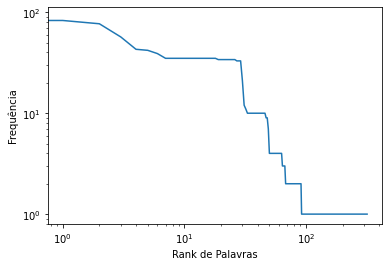

In [47]:
# Importa a biblioteca matplotlib com o nome de 'plt'
import matplotlib.pyplot as plt
%matplotlib inline

# Conta o número de palavras
contador_palavras = sorted(Counter(palavras).values(), reverse=True)

plt.loglog(contador_palavras)
plt.ylabel("Frequência")
plt.xlabel("Rank de Palavras")

## Histogramas de palavras, screen names e hashtags

O código abaixo apresenta histogramas para as palavras, screen names e hashtags. 


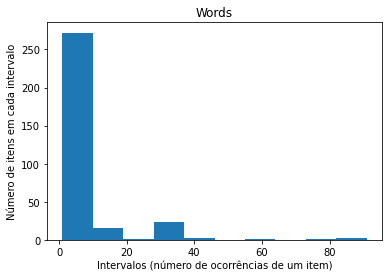

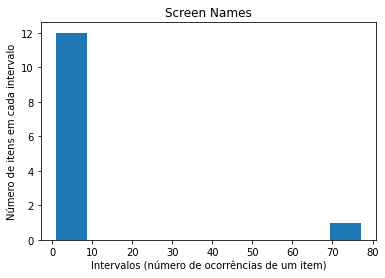

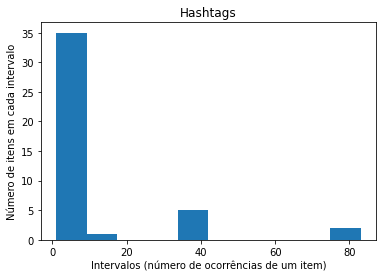

<Figure size 432x288 with 0 Axes>

In [48]:
# Loop que itera sobre os dados de palavras, screen names e hashtags
for label, data in (('Words', palavras), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Cria um mapa de frequência para cada conjunto de dados e plota os valores
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Adiciona um título para o gráfico e um subtítulo para o eixo Y
    plt.title(label)
    plt.ylabel("Número de itens em cada intervalo")
    plt.xlabel("Intervalos (número de ocorrências de um item)")
    
    # ... e mostra como uma nova figura
    plt.figure()

#Exercícios

1. Escreva um código abaixo para buscar a lista de tópicos em tendência na Itália. Você deve se basear no código apresentado acima. 



In [39]:
# Preencha abaixo com o código para buscar os tópicos na localização WOE = Itália. 
#import json

# Variável 'q' seta para o tópico 'Portugal'

# Tente outras palavras mudando o valor desta variável. 
q = '#Italia' 

count = 100

# Importa modulo 'unquote' para prevenir erros em url 
from urllib.parse import unquote

# Solicita a pesquisa através do método twitter_api.search.tweets, passando como
# parâmetro a string em *q*.

resultados_pesquisa = twitter_api.search.tweets(q=q, count=count)

statuses = resultados_pesquisa['statuses']

# Faz a iteração em 5 blocos de resultados seguindo um 'cursor'
for _ in range(5):
    print('Tamanho do conjunto de status', len(statuses))
    try:
        proximos_resultados = resultados_pesquisa['search_metadata']['proximos_resultados']
    except KeyError as e: # Termina quando proximos_resultados termina de existir
        break
        
    # Cria um dicionário de proximos_resultados
    kwargs = dict([ kv.split('=') for kv in unquote(proximos_resultados[1:]).split("&") ])
    
    resultados_pesquisa = twitter_api.search.tweets(**kwargs)
    statuses += resultados_pesquisa['statuses']

# Mostra uma pequena amostra do resultado.
# O resultado está no formato JSON, conforme mostrado abaixo.
print(json.dumps(statuses[0], indent=1))
#


Tamanho do conjunto de status 100
{
 "created_at": "Mon Jul 05 22:07:31 +0000 2021",
 "id": 1412171310147555331,
 "id_str": "1412171310147555331",
 "text": "#RafaellaCarra #Regina #Italia #Bella #Bravissima",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "RafaellaCarra",
    "indices": [
     0,
     14
    ]
   },
   {
    "text": "Regina",
    "indices": [
     15,
     22
    ]
   },
   {
    "text": "Italia",
    "indices": [
     23,
     30
    ]
   },
   {
    "text": "Bella",
    "indices": [
     31,
     37
    ]
   },
   {
    "text": "Bravissima",
    "indices": [
     38,
     49
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "und",
  "result_type": "recent"
 },
 "source": "<a href=\"https://mobile.twitter.com\" rel=\"nofollow\">Twitter Web App</a>",
 "in_reply_to_status_id": 1412168446947758082,
 "in_reply_to_status_id_str": "1412168446947758082",
 "in_reply_to_user_id": 132784037221145

2. Mostre a lista de tópicos na forma de uma tabela. 


In [40]:
# Preencha abaixo com o código mostrar os tópicos em um tabela 'bonitinha'.
## Importamos o módulo PrettyTable
from prettytable import PrettyTable

# Loop para montar três tabelas, cada uma contendo duas colunas. 
# A primeira colunoa mostra a informação (Palavra ou ScreenName ou Hashtag)
# A segunda coluna mostra o número de ocorrências (Count)
for label, data in (('Palavra', palavras), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Ajusta o alinhamento das colunas (left,right)
    print(pt)
#


+---------+-------+
| Palavra | Count |
+---------+-------+
| RT      |    70 |
| #Italia |    38 |
| a       |    29 |
| di      |    27 |
| e       |    27 |
| il      |    26 |
| la      |    24 |
| in      |    20 |
| de      |    18 |
| Carrà   |    17 |
+---------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| raffaella       |    16 |
| JoseCarlosRRuiz |    14 |
| Gianmar26145917 |     8 |
| LopezOlvera     |     4 |
| UnicoPadreSanto |     4 |
| BasurtoFA       |     4 |
| josemagarrido   |     4 |
| danielancheytac |     4 |
| Signorasinasce  |     3 |
| sabiasundato_o  |     3 |
+-----------------+-------+
+----------------+-------+
| Hashtag        | Count |
+----------------+-------+
| Italia         |    48 |
| 5luglio        |    14 |
| Mattarella     |     6 |
| Macron         |     5 |
| DdlZan         |     5 |
| RaffaellaCarrà |     5 |
| Euro2020       |     4 |
| 5Jul           |     4 |
| RaffaelaCarra  |     3 |
| It